# SWMAL Exercise 1 Intro


 

### Setup
#comment
This is the setup we where allowed to keep. Please skip to Qa to find the start of the journal

In [2]:
#comment

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("IGNORING: Saving figure", fig_id) # SWMAL: I've disabled saving of figures
    #if tight_layout:
    #    plt.tight_layout()
    #plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

print("OK")

OK


In [3]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

print("OK")

OK


In [4]:
import os
datapath = os.path.join("../datasets", "lifesat", "")

# NOTE: a ! prefix makes us able to run system commands..
# (command 'dir' for windows, 'ls' for Linux or Macs)
#
! dir
! ls

print("\nOK")

/bin/bash: dir: command not found


Figs                      demo.ipynb                modules_and_classes.ipynb
datasets                  intro.ipynb
datasets.zip              lesson01.pdf

OK


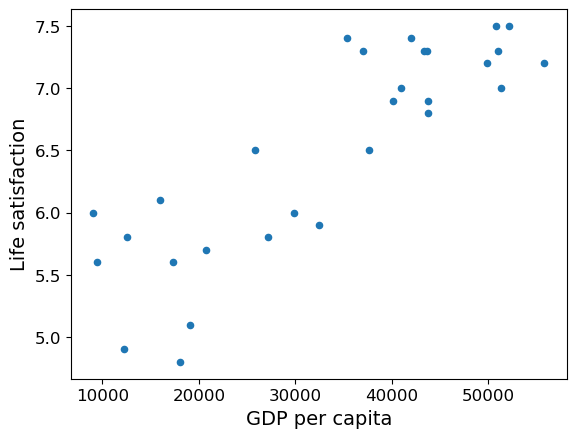

[[5.96242338]]
OK


In [5]:
# Code example
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
try:
    oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
    gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")
except Exception as e:
    print(f"SWMAL NOTE: well, you need to have the 'datasets' dir in path, please unzip 'datasets.zip' and make sure that its included in the datapath='{datapath}' setting in the cell above..")
    raise e
    
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)



# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
y_pred = model.predict(X_new)
print(y_pred) # outputs [[ 5.96242338]]


print("OK")

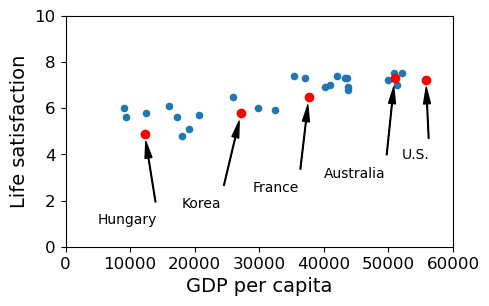

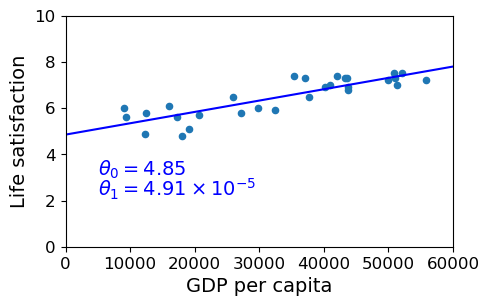

OK


In [6]:
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
#oecd_bli.head(2)

gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
#gdp_per_capita.head(2)

full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
#full_country_stats

remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
#missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
#save_fig('money_happy_scatterplot')
plt.show()

from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)

t0 = 4.8530528
t1 = 4.91154459e-05

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
M=np.linspace(0, 60000, 1000)
plt.plot(M, t0 + t1*M, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
#save_fig('best_fit_model_plot')
plt.show()

print("OK")

## Qa: The $\theta$ parameters and the $R^2$ Score
We will be using the $\theta$ parameters from the model declared above. 
To use the $\theta$ parameters we must extract them from the model. If we want to get the intercept and coefficient params, also called $\theta_0$ and $\theta_1$. For a given model, it is possible to extract $\theta_0$ and $\theta_1$ with following python attributes.


In [7]:
theta0 = model.intercept_  # Intercept
theta1 = model.coef_[0]   

print(f"{theta0}")
print(f"{theta1}")

[4.8530528]
[4.91154459e-05]


In [8]:
r_sq = model.score(X,y)

print(f"{r_sq}")

0.7344414355437031


The $R^2$ score, that is showed, is the coefficient of determination. It determines the fitness of the data to the linear model. It has a max value of 1, which indicates that the data match perfectly to the linear model. 
If you have a coefficient of determination below 0, it indicates that the model that is in use in incorrect.
Therefore the values for $R^2~$ range from minus infinity to 1

It is best to have a high score, as to the fact that the max value 1 tells us that the data fit perfectly to the linear model. 

### Qb) Using k-Nearest Neighbors

In this exercise we will be using the K-nearest neighbors to train the model.

K-nearest is a supervised learning classifier. It uses the amount k nearest data points in the training dataset it has while the linear regression model doesn't use anything when instantiated. 
The default value for K-nearest model is 5 if you don't change it. The method for calling fit and predict both for K-nearest model and linear regression model are the same. 

The score of the model can be compared in the sense that they provide information on how well the model performs. The score will not have a precise and definite saying about which model is best, but if one of the models are almost zero or less compared to another model is are almost 1, we can say that the model closest to 1 is a better model in this thought experiment. If you want to compare them you will also have to look at other different evaluation types like F1-Score. 

In [9]:
# and this is our preprocessed data
country_stats

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


In the cell below we start with preparing the data and visualizing it. 
We use the K-nearest neighbor regressor from sklearn which can be found: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

X.shape= (29, 1)
y.shape= (29, 1)


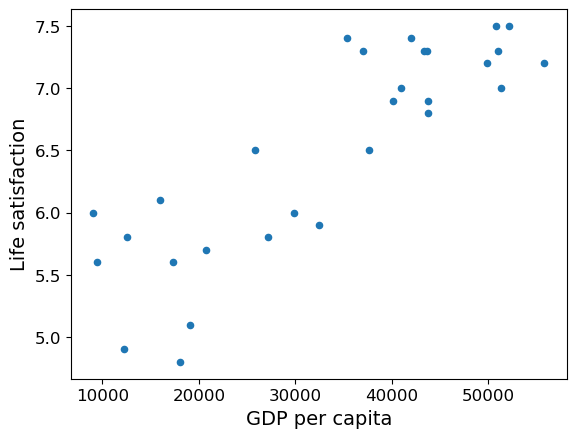

K-nearstneighbor prediction for Cypress: [[5.76666667]]
Linearregression prediction for Cypress: [[5.96242338]]


In [10]:
# Import the KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
#Prepare the data

X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

print("X.shape=",X.shape)
print("y.shape=",y.shape)


# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')

plt.show()

# Instantiate 
knn = KNeighborsRegressor(n_neighbors=3)

# Train model
knn.fit(X, y)

# Predict and print the knn = 5.766667
print(f"K-nearstneighbor prediction for Cypress: {knn.predict(X_new)}")# knn = ..
print(f"Linearregression prediction for Cypress: {lin1.predict(X_new)}")

As you can see the prediction for the k-nearest neighbor and linear regression are close to each other. However, they are not the same. This is due to the fact that they are fundamentally different algorithms.

### Qc) Tuning Parameter for k-Nearest Neighbors and A Sanity Check

In this chapter we will look into the tuning of parameter for k-nearest neighbors. By changing the parameter we will look into how it works and do a santity check. We will answer why the score closed to 1 does not mean, that the k-nearest nieghbors is the right esimater for the job. 

The problem with having a k-nearest neighbor produces a score that is 1. It makes a prediction based on the single closest value and that can cause overfitting. Or as you can see on the picture where N=1, the line does follow the rest of the data and is overfitting.

It is also a problem if the k-nearest neighbor gets too large, because the data does not follow the data as you can observe below where K=20.

<img src="https://itundervisning.ase.au.dk/SWMAL/L01/Figs/regression_with_knn.png"  alt="WARNING: could not get image from server." style="height:150px">

1 nearest neighbour score: 1.0
3 nearest neighbour score: 0.8525732853499179
10 nearest neighbour score: 0.7833080605150065


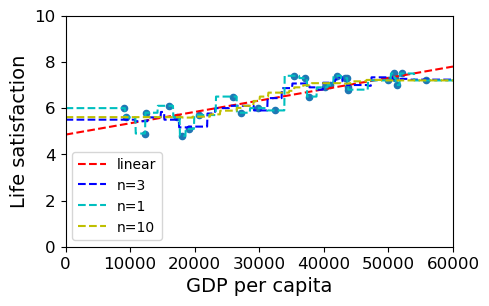

In [11]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])

# create an test matrix M, with the same dimensionality as X, and in the range [0;60000] 
# and a step size of your choice
m=np.linspace(0, 60000, 1000)
M=np.empty([m.shape[0],1])
M[:,0]=m

# from this test M data, predict the y values via the lin.reg. and k-nearest models
y_pred_lin = model.predict(M)
y_pred_knn = knn.predict(M) 

# use plt.plot to plot x-y into the sample_data plot..
# Plot linear regression
plt.plot(m, y_pred_lin, "r--", label="linear")

# Plot Neighbor set to 3
plt.plot(m, y_pred_knn, "b--", label="n=3")

# Import the KNeighbor regressor
from sklearn.neighbors import KNeighborsRegressor

# Neighbor set to 1
knn1 = KNeighborsRegressor(n_neighbors=1)
knn1.fit(X, y)
y_pred_knn1 = knn1.predict(M)
plt.plot(m, y_pred_knn1, "c--", label="n=1")

# Neighbor set to 10
knn2 = KNeighborsRegressor(n_neighbors=10)
knn2.fit(X, y)
y_pred_knn2 = knn2.predict(M)
plt.plot(m, y_pred_knn2, "y--", label="n=10")

# Legends
plt.legend()

# Print 
print(f"1 nearest neighbour score: {knn1.score(X, y)}")
print(f"3 nearest neighbour score: {knn.score(X, y)}")
print(f"10 nearest neighbour score: {knn2.score(X, y)}")

Above you can both see the score and the plotting of the 3 different amounts of neighbors. The K-nearest neighbor with 1 neighbor has a score 1, and follows the data complete, which is overfitting. The n=3 is better because it follows the flow, but not as much and are less change of overfitting. Looking at n=10 the line is much smoother, but this will also mean that there is a loss of detail. 
It is difficult to tell which model are the best one from the diagram. The goal is to have a balance between having a small enough k to capture local patterns and but also large enough to reduce noise.

### Qd) Trying out a Neural Network

We are going to try to use the neural network. We are using the Multi-Layer Perceptron (MLP) for regression. We find the MLPregressor here: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

OBS. Each run of the column below produces a different outcome, because we make a new MPLRegressor and training again.  

In [24]:
from sklearn.neural_network import MLPRegressor;

# Setup MLPRegressor
mlp = MLPRegressor( hidden_layer_sizes=(10,), solver='adam', activation='relu', tol=1E-5, max_iter=100000, verbose=True);

mlp.fit(X, y.ravel())

# lets make a MLP regressor prediction and redo the plots
y_pred_mlp = mlp.predict(M)

Iteration 1, loss = 103973.70805067
Iteration 2, loss = 94453.76574481
Iteration 3, loss = 85404.46329600
Iteration 4, loss = 76833.18742100
Iteration 5, loss = 68745.92120590
Iteration 6, loss = 61147.09257150
Iteration 7, loss = 54039.42244438
Iteration 8, loss = 47423.77504388
Iteration 9, loss = 41299.01321714
Iteration 10, loss = 35661.86233206
Iteration 11, loss = 30506.78685617
Iteration 12, loss = 25825.88438528
Iteration 13, loss = 21608.80250166
Iteration 14, loss = 17842.68438490
Iteration 15, loss = 14512.14950113
Iteration 16, loss = 11599.31587194
Iteration 17, loss = 9083.87027414
Iteration 18, loss = 6943.19213986
Iteration 19, loss = 5152.53581267
Iteration 20, loss = 3685.27408974
Iteration 21, loss = 2513.20360678
Iteration 22, loss = 1606.90963009
Iteration 23, loss = 936.18432471
Iteration 24, loss = 470.48878361
Iteration 25, loss = 179.44534259
Iteration 26, loss = 33.34335407
Iteration 27, loss = 3.63906801
Iteration 28, loss = 63.42895392
Iteration 29, loss = 1

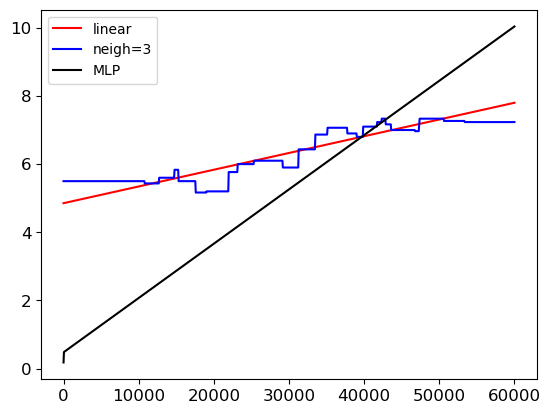

In [23]:
plt.plot(m, y_pred_lin, "r", label="linear")
plt.plot(m, y_pred_knn, "b", label="neigh=3")
plt.plot(m, y_pred_mlp, "k", label="MLP")
plt.legend();

In [14]:
print(f"MLP score:  {mlp.score(X, y)}")
print(f"K-nearstneighbor=3 score: {knn.score(X, y)}")
print(f"Linearregression score: {lin1.score(X, y)}")

MLP score:  -3.6741440524092503
K-nearstneighbor=3 score: 0.8525732853499179
Linearregression score: 0.7344414355437031


The score for the MLP differs each time you train the model, sometimes the score is -25.42, -3.85 or other values. As we can observe both from the score and the plot the Multi-Layer Perception from the Neural Network does not fit the data well for iterations up till 10000. The score can again be used as a indicator of the fitness of the model. 
As we can see the data-set for the training does not scale well with the MLP without prescaling. The next chapter we will use the prescaling. 